# About dataset information 
## Breast cancer

. Here's a breakdown of the columns:

`id:` Identification number for each observation.

`diagnosis:` Diagnosis of the breast cancer (e.g., malignant or benign).

`radius_mean:` Mean of distances from center to points on the perimeter.

`texture_mean:` Standard deviation of gray-scale values.

`perimeter_mean:` Mean size of the core tumor.

`area_mean:` Mean area of the core tumor.

`smoothness_mean:` Mean of local variation in radius lengths.

`compactness_mean:` Mean of perimeter^2 / area - 1.0.

`concavity_mean:` Mean severity of concave portions of the contour.

`concave points_mean:` Mean number of concave portions of the contour.

`symmetry_mean:` Mean symmetry.

`fractal_dimension_mean:` Mean "coastline approximation" - 1.

`radius_se:` Standard error of distances from center to points on the perimeter.

`texture_se:` Standard error of gray-scale values.

`perimeter_se:` Standard error of the size of the core tumor.

`area_se:` Standard error of the area of the core tumor.

`smoothness_se:` Standard error of local variation in radius lengths.

`compactness_se`: Standard error of perimeter^2 / area - 1.0.

`concavity_se:` Standard error of severity of concave portions of the contour.

`concave points_se:` Standard error of number of concave portions of the contour.

`symmetry_se:` Standard error of symmetry.

`fractal_dimension_se:` Standard error of "coastline approximation" - 1.

`radius_worst:` "Worst" or largest mean value for mean of distances from center to points on the perimeter.

`texture_worst:` "Worst" or largest mean value for standard deviation of gray-scale values.

`perimeter_worst:` "Worst" or largest mean value for mean size of the core tumor.

`area_worst:` "Worst" or largest mean value for mean area of the core tumor.

`smoothness_worst:`"Worst" or largest mean value for mean of local variation in radius lengths.

`compactness_worst:` "Worst" or largest mean value for mean of perimeter^2 / area - 1.0.

`concavity_worst:` "Worst" or largest mean value for mean severity of concave portions of the contour.

`concave points_worst:` "Worst" or largest mean value for mean number of concave portions of the contour.

`symmetry_worst:` "Worst" or largest mean value for mean symmetry.

`fractal_dimension_worst:` "Worst" or largest mean value for mean "coastline approximation" - 1.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
df=pd.read_csv('Breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
df.shape

(569, 33)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [19]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(455, 30)

In [22]:
x_test.shape

(114, 30)

In [24]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred=knn.predict(x_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

In [28]:
print('accuracy_score : ',accuracy_score(y_test,y_pred))
print('confusion_matrix : ',confusion_matrix(y_test,y_pred))
print('classification_report :',classification_report(y_test,y_pred))


accuracy_score :  0.956140350877193
confusion_matrix :  [[71  0]
 [ 5 38]]
classification_report :               precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

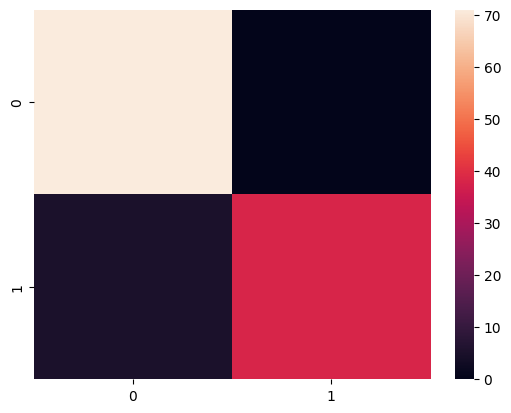

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred))